# Task 1 Implementation of Power Iteration Algorithm

## (A) Implement the power iteration algorithm in matrix form to calculate the rank vector r, without teleport, using the PageRank formulation: r(t+1) = M · r(t) The matrix M is an adjacency matrix representing nodes and edges from your downloaded dataset, with rows representing destination nodes and columns representing source nodes. This matrix is sparse2. Initialize r(0) = [1/N, . . . , 1/N ]T . Let the stop criteria of your power iteration algorithm be ||r(t+1) − r(t)||1 < 0.02 (please note the stop criteria involves the L1 norm). Spider traps and dead ends are not considered in this first task.

In [8]:
# loading needed library
import numpy as np
from scipy.sparse import csr_matrix
import time

def read_edges(file_path):
    """
    @Param: file_path - The path to the target file containing edge data.
    @Return: A list of tuples representing edges where each tuple contains a source node (src) and a destination node (dst).
    @Desc: This function reads a file line by line, splits each line by spaces to extract the source (src) and destination (dst) nodes,
           and appends each edge as a tuple (src, dst) to the 'edges' list.
    """
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            src, dst = map(int, line.strip().split()) #split context by space then append it into edges by src(from) and dst(to)
            edges.append((src, dst))
    return edges


def build_transition_matrix(edges, num_nodes):
    """
    @Param: edges - A list of tuples representing edges between nodes (source, destination).
    @Param: num_nodes - The total number of nodes in the graph.
    @Return: The transition matrix as a sparse matrix.
    @Desc: This function constructs a transition matrix where each entry represents the probability of transitioning
           from one node to another. It first calculates the out-degree (number of outgoing edges) for each node.
           Then, it populates the transition matrix with values that are the inverse of the out-degree for each edge, 
           ensuring that the sum of probabilities for outgoing edges from any node equals 1.
    """
    row = []
    col = []
    data = []
    out_degree = np.zeros(num_nodes)

    for src, dst in edges:
        out_degree[src] += 1

    for src, dst in edges:
        if out_degree[src] > 0:
            row.append(dst)
            col.append(src)
            data.append(1 / out_degree[src])

    M = csr_matrix((data, (row, col)), shape=(num_nodes, num_nodes))
    return M, out_degree

def power_iteration(M, N, tol=0.02, max_iter=100):
    """
    @Param M: The adjacency matrix representing the graph.
    @Param num_nodes: The total number of nodes in the graph.
    @Param max_iter: The maximum number of iterations allowed (default is 100).
    @Param tol: The tolerance threshold for convergence (default is 0.02).
    @Return: A tuple containing the PageRank vector, the number of iterations performed, and the computation time.
    @Desc: This function calculates the PageRank vector using the power iteration method. It iteratively updates
           the rank vector r according to the equation r(t+1) = M * r(t) until convergence is achieved (i.e., 
           the difference between successive rank vectors is less than the tolerance tol) or the maximum number 
           of iterations is reached.
    """
    
    
    r = np.ones(N) / N #Initialize r(0) as [1/N, 1/N, ..., 1/N]^T
    delta = float('inf')  # Initialize delta
    iteration = 0  # Counting for iteration
    
    start_time = time.time()
    while delta > tol and iteration < max_iter:
        r_new = M.dot(r)  # Matrix-vector multiplication
        
        if not np.isfinite(r_new).all():
            raise ValueError("Matrix-vector multiplication resulted in NaNs or inf values.")
        
        delta = np.linalg.norm(r_new - r, 1)  # Using L1 norm
        r = r_new
        iteration += 1
    
    if iteration >= max_iter:
        print("Warning: Maximum number of iterations reached.")
    end_time = time.time()
    return r, iteration, end_time - start_time

### (B)Run your code on the provided Google web data to calculate the rank score for all the nodes. Report: (1) The running time of your power iteration algorithm; (2) Thenumber of iterations needed to stop; (3) The IDs and scores of the top-10 ranked nodes.

In [9]:

def get_top_10(rank_vector):
    top_indices = np.argsort(rank_vector)[-10:][::-1]  # Get indices of top-10 ranked nodes
    top_scores = rank_vector[top_indices]  # Get scores of top-10 ranked nodes
    
    print(f"Running time: {running_time} seconds")
    print(f"Number of iterations: {iterations}")
    
    print("Top-10 ranked nodes and their scores:")
    for index, node in enumerate(top_indices):
        print(f"Rank {index+1}: Node ID {node}, Score {top_scores[index]}")

num_nodes = 875713
M = read_edges("web-Google-final.txt")
M , out_links= build_transition_matrix(M,num_nodes)
rank_vector, iterations, running_time = power_iteration(M,num_nodes)
get_top_10(rank_vector)

Running time: 1.7386479377746582 seconds
Number of iterations: 49
Top-10 ranked nodes and their scores:
Rank 1: Node ID 747106, Score 0.0005345603460899297
Rank 2: Node ID 544138, Score 0.0005194744763984448
Rank 3: Node ID 24576, Score 0.0005194744763984448
Rank 4: Node ID 370344, Score 0.0005194744763984448
Rank 5: Node ID 779617, Score 0.0004295776902741783
Rank 6: Node ID 839863, Score 0.0003597691245966676
Rank 7: Node ID 865192, Score 0.0003209062000229689
Rank 8: Node ID 791675, Score 0.0003072127519250468
Rank 9: Node ID 1536, Score 0.00024407134714058418
Rank 10: Node ID 41909, Score 0.00023459915521843345


# Task 2 [10 points]: Understanding dead-ends.

## (A) [5 points] Calculate and report the number of dead-end nodes in your matrix

In [10]:
def count_dead_ends(out_links):
    """
    @Param out_links: A numpy array where each element represents the out-degree of a node (i.e., the number of outgoing edges).
    @Return: The number of dead-end nodes in the graph.
    @Desc: This function counts the number of dead-end nodes, which are nodes with zero out-degree (i.e., nodes that have no outgoing edges).
    """
    # Find nodes with zero out-degree
    return np.sum(out_links == 0)    
    



dead_ends = count_dead_ends(out_links)



print(dead_ends)


187880


### (B) Calculate the leaked PageRank score in each iteration of Task 1 (B). The leaked PageRank score is the total score you lose in that iteration because of dead-ends (hint: see example on slide 2 of W1.3 lecture notes). Create a plot that shows how this leaked score behaves as iterations progress. Explain the phenomenon you observe from this visualization

Number of iterations: 49
Running time: 1.88 seconds


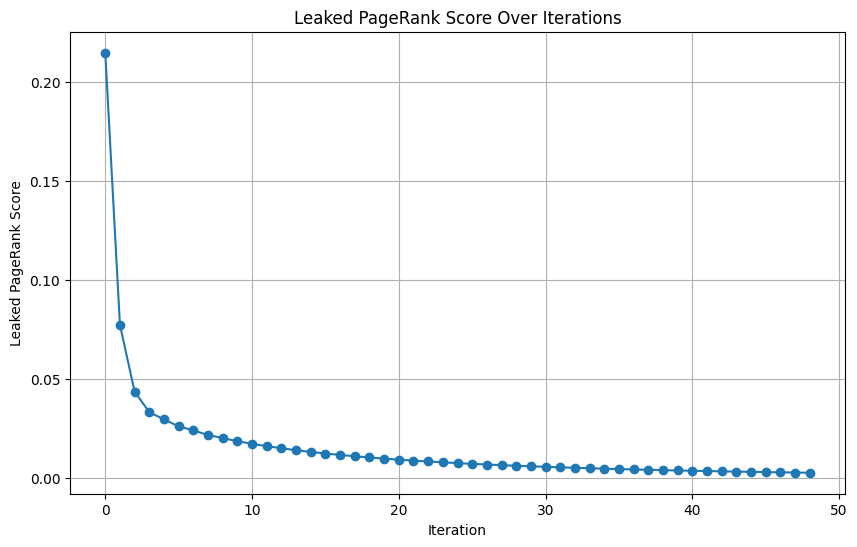

In [11]:
import matplotlib.pyplot as plt

def power_iteration_with_leakage_tracking(M, num_nodes, out_links,max_iter=100, tol=0.02):
    """
    @Param M: The adjacency matrix representing the graph.
    @Param num_nodes: The total number of nodes in the graph.
    @Param out_links: A numpy array representing the out-degree (number of outgoing edges) for each node.
    @Param max_iter: The maximum number of iterations allowed (default is 100).
    @Param tol: The tolerance threshold for convergence (default is 0.02).
    @Return: A tuple containing the PageRank vector, the number of iterations performed, the computation time, 
             and a list of leaked PageRank scores across iterations.
    @Desc: This function calculates the PageRank vector using the power iteration method while tracking the leakage
           caused by dead-end nodes (nodes with zero out-degree). It iteratively updates the rank vector r and 
           calculates the leaked PageRank score at each iteration. The process continues until the rank vector 
           converges (i.e., the difference between successive rank vectors is less than the tolerance tol) or the 
           maximum number of iterations is reached.
    """
    r = np.ones(num_nodes) / num_nodes #Initialize r(0) as [1/N, 1/N, ..., 1/N]^T
    start_time = time.time()
    leaked_scores = []#list to store recoarding of leak scores
    dead_end_mask = np.where(out_links == 0)[0]# Find the dead-end nodes
    delta = float('inf')  # Initialize delta
    iteration = 0
    while delta > tol :
        r_new = M.dot(r)  # Matrix-vector multiplication
        leaked_score = np.sum(r[dead_end_mask])
        leaked_scores.append(leaked_score)  
        if not np.isfinite(r_new).all():
            raise ValueError("Matrix-vector multiplication resulted in NaNs or inf values.")
        
        delta = np.linalg.norm(r_new - r, 1)  # Using L1 norm
        r = r_new
        iteration += 1
    
    if iteration >= max_iter:
        print("Warning: Maximum number of iterations reached.")
    end_time = time.time()
    return r, iteration, end_time - start_time, leaked_scores


def plot_leaked_scores(leaked_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(leaked_scores, marker='o')
    plt.title('Leaked PageRank Score Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Leaked PageRank Score')
    plt.grid(True)
    plt.show()



rank_vector, iterations, running_time, leaked_scores = power_iteration_with_leakage_tracking(M, num_nodes, out_links)





print(f"Number of iterations: {iterations}")
print(f"Running time: {running_time:.2f} seconds")

plot_leaked_scores(leaked_scores)


## phenomenon Explaintion
#### I can infer from the plot that the initial pagerank score—roughly 0.20—is rather high. According to the high frequency of dead ends, there is significant leakage. Additionally, the second aspect that is deserving notice is that the lead pagerank scores are steadily falling during the first ten iterations, indicating that the algorithm effectively rearranged the pagerank. Furthermore, the decline rate progressively approaches zero after 20 rounds. This indicates that by spreading the rank scores, the PageRank algorithm has successfully addressed the majority of the leakage.

# Task 3 [50 points]: Implementation of Power Iteration with Teleport

### (A)[25 points] Extend your PageRank code to handle both spider traps and dead ends using the idea of teleport. In this task, your implementation will allow to teleport randomly to any node. Code the PageRank with teleport formulation that, using the sparse matrix M, for each iteration works in three steps (slide 8 of W1.3 lecture notes)

In [12]:

def power_iteration_with_teleportation(M,N, beta = 0.9, max_iter=100, tol = 0.02):
    """
    @Param M: The adjacency matrix representing the graph.
    @Param num_nodes: The total number of nodes in the graph.
    @Param out_links: A numpy array representing the out-degree (number of outgoing edges) for each node.
    @Param max_iter: The maximum number of iterations allowed (default is 100).
    @Param tol: The tolerance threshold for convergence (default is 0.02).
    @Return: A tuple containing the PageRank vector, the number of iterations performed, the computation time, 
             and a list of leaked PageRank scores across iterations.
    @Desc: This function calculates the PageRank vector using the power iteration method while tracking the leakage
           caused by dead-end nodes (nodes with zero out-degree). It iteratively updates the rank vector r and 
           calculates the leaked PageRank score at each iteration. The process continues until the rank vector 
           converges  or the maximum number of iterations is reached.
    """
    if(beta == 1) : # means no teleport used, hence can direct use old function:        
        return power_iteration(M,N)
    r = np.ones(N)/N
    start_time = time.time()
    delta = float('inf')
    iter= 0 
    while delta > tol and iter < max_iter:
        r_new = beta * (M.dot(r))
        S = np.sum(r_new)
        r_new = r_new + (1-S) / N
        delta = np.linalg.norm(r_new - r,1)
        r = r_new 
        iter +=1;
    end_time = time.time()
    return r, iter,end_time - start_time


### (B)Run your code on the provided Google web data to calculate the rank score for all the nodes. Report: (1) The running time; (2) The number of iterations needed tostop; (3) The IDs and scores of the top-10 ranked nodes

In [13]:
rank_vector, iterations, running_time = power_iteration_with_teleportation(M, num_nodes)
get_top_10(rank_vector)

Running time: 0.359464168548584 seconds
Number of iterations: 10
Top-10 ranked nodes and their scores:
Rank 1: Node ID 41909, Score 0.0010427837430056878
Rank 2: Node ID 597621, Score 0.0010085543280290267
Rank 3: Node ID 537039, Score 0.00100092011583959
Rank 4: Node ID 163075, Score 0.0009896658562560728
Rank 5: Node ID 384666, Score 0.0008592863859820073
Rank 6: Node ID 504140, Score 0.0008471523701736194
Rank 7: Node ID 486980, Score 0.000818502229483536
Rank 8: Node ID 558791, Score 0.0008118426515454613
Rank 9: Node ID 32163, Score 0.0007867592578671955
Rank 10: Node ID 605856, Score 0.0007683514792191945


### (C)Vary the teleport probability β with numbers in the set: {1, 0.9, 0.8, 0.7, 0.6}. Report the number of iterations needed to stop for each β. Explain, in words, your findingsfrom this experiment.



In [14]:
betas = [1, 0.9, 0.8, 0.7, 0.6, 0.3, 0.1]
results = []

for beta in betas:
    rank_vector, iterations, running_time = power_iteration_with_teleportation(M, num_nodes, beta=beta)
    results.append((beta, iterations, running_time))

print("Teleport Probability (β) | Number of Iterations | Running Time (s)")
for beta, iterations, running_time in results:
    print(f"{beta:<24} {iterations:<22} {running_time:.2f}")


Teleport Probability (β) | Number of Iterations | Running Time (s)
1                        49                     1.78
0.9                      10                     0.38
0.8                      7                      0.27
0.7                      5                      0.19
0.6                      5                      0.19
0.3                      3                      0.14
0.1                      2                      0.07


The test demonstrates that both the PageRank algorithm's running time and its number of iterations generally decrease as the teleport probability (β) cuts. Higher β causes the algorithm to rely more on teleportation, which makes it take longer and require more iterations. On the other hand, since the technique relies more on the link structure than teleportation, a smaller β leads to a faster convergence and shorter calculation durations. Reducing β improves the overall efficiency of the PageRank algorithm by shortening the time and number of iterations required to find a stable solution.
